# Laboratory Task 2 – Forward Pass

Instruction: Perform a single forward pass and compute for the error.

In [15]:
# 1. Perform Standard Imports
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
# 2. Define the activation function (ReLU)
def relu(x):
    return np.maximum(0, x)

In [9]:
# 3. Initialize the inputs, weights, and biases
x = np.array([1, 0, 1])
y_true = np.array([1])
hidden_weights = np.array([[0.2, 0.4, -0.5], [-0.3, 0.1, 0.2]])
hidden_biases = np.array([-0.4, 0.2])
output_weights = np.array([-0.3, -0.2])
output_bias = np.array([0.1])

In [10]:
# 4. Perform the forward pass
z_hidden = np.dot(hidden_weights, x) + hidden_biases
a_hidden = relu(z_hidden)
z_output = np.dot(output_weights, a_hidden) + output_bias
y_pred = z_output


In [11]:
# 5. Compute the MSE Loss
# The 0.5 factor simplifies the derivative during backpropagation
loss = 0.5 * (y_true - y_pred)**2

In [12]:
# 6. Print results
print(f"Final Prediction (y_pred): {y_pred[0]:.4f}")
print(f"MSE Loss: {loss[0]:.4f}")

Final Prediction (y_pred): 0.0800
MSE Loss: 0.4232


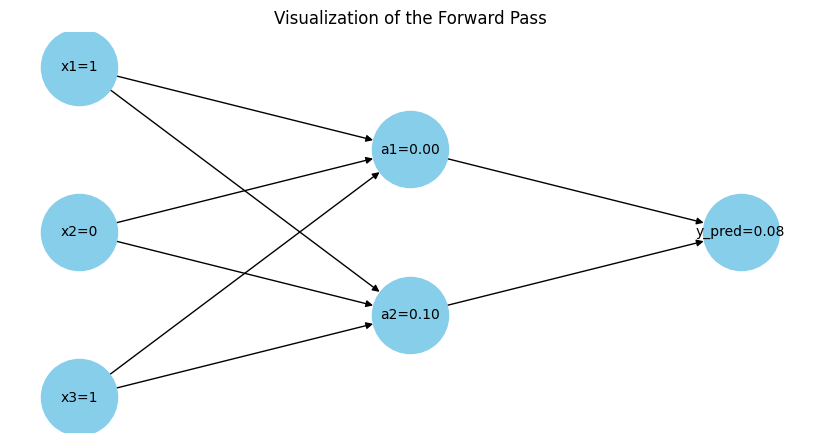

In [14]:
# 7. Visualization (This remains the same)
G = nx.DiGraph()
# Nodes
G.add_node("x1", pos=(0, 2), label=f'x1={x[0]}')
G.add_node("x2", pos=(0, 1), label=f'x2={x[1]}')
G.add_node("x3", pos=(0, 0), label=f'x3={x[2]}')
G.add_node("h1", pos=(1, 1.5), label=f'a1={a_hidden[0]:.2f}')
G.add_node("h2", pos=(1, 0.5), label=f'a2={a_hidden[1]:.2f}')
G.add_node("out", pos=(2, 1), label=f'y_pred={y_pred[0]:.2f}')
# Edges
for i in range(3):
    G.add_edge(f"x{i+1}", "h1")
    G.add_edge(f"x{i+1}", "h2")
G.add_edge("h1", "out")
G.add_edge("h2", "out")

pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(8, 4))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, arrows=True)
plt.title("Visualization of the Forward Pass")
plt.show()

### Reflection
* A **forward pass** is the fundamental process a neural network uses to make a prediction.

* This lab demonstrates how input data is transformed by the network's **weights and biases** at each layer to produce a final output.

* The visualization provides a clear diagram of this information flow, from the initial inputs, through the hidden layer's activations, to the final prediction `(y_pred)`.

* The final step is to compare this prediction to the true value to calculate the error, which measures how wrong the prediction was.